### Importing necessary libraries

In [165]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import time 
import os

### Checking for GPU/CPU

In [166]:
devices = [ "CPU" , "GPU" ]
for device in devices:
  out = tf.config.list_physical_devices ( device )
  if len ( out ) > 0:
    print ( device , "is available." )
    print ( device )
  else:
    print ( device , "is not available." )

CPU is available.
CPU
GPU is available.
GPU


### Checking the GPU configuration

In [167]:
!nvidia-smi

Sun Jan 24 06:36:33 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0    34W /  70W |    297MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Importing the MNIST data

In [168]:
mnist = tf.keras.datasets.mnist
( X_train_full , y_train_full ) , ( X_test , y_test ) = mnist.load_data ( )

### Checking the size of train and test data

In [169]:
print ( "X_train: {}\ty_train: {}" .format ( X_train_full.shape , y_train_full.shape ) )
print ( "X_test: {} \ty_test: {}" .format ( X_test.shape , y_test.shape ) )

X_train: (60000, 28, 28)	y_train: (60000,)
X_test: (10000, 28, 28) 	y_test: (10000,)


### Normalizing the data

In [170]:
X_train_full , X_test = X_train_full / 255 , X_test / 255

### Indicing the validation data from training data

In [171]:
X_valid , y_valid = X_train_full [ : 5000 ] , y_train_full [ : 5000 ]
X_train , y_train = X_train_full [ 5000 : ] , y_train_full [ 5000 : ]
print ( "Shape of Validation Data:" , X_valid.shape )
print ( "Shape of Training Data:" , X_train.shape )

Shape of Validation Data: (5000, 28, 28)
Shape of Training Data: (55000, 28, 28)


### Visualizing a few samples using Seaborn

Number corresponding to the training sample: 7


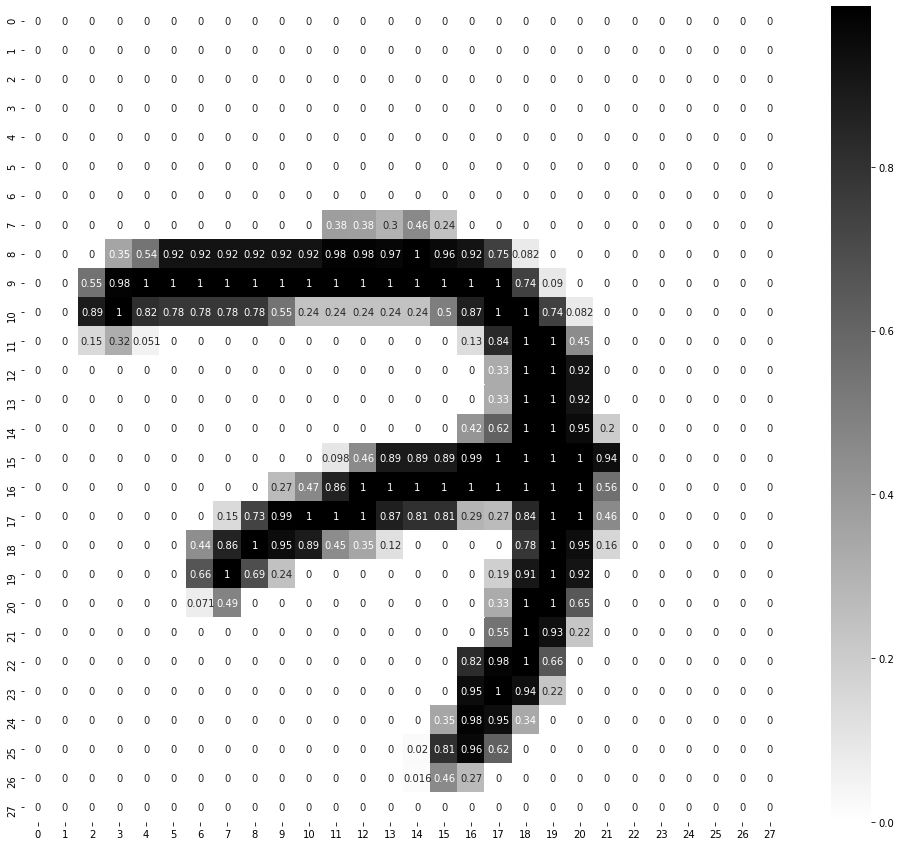

In [172]:
f , ax = plt.subplots ( figsize = ( 17 , 15 ) )
print ( "Number corresponding to the training sample:" , y_train [ 0 ] )
sns.heatmap ( X_train [ 0 ] , cmap = "binary" , annot = True )
plt.show ( )

Number corresponding to the training sample: 3


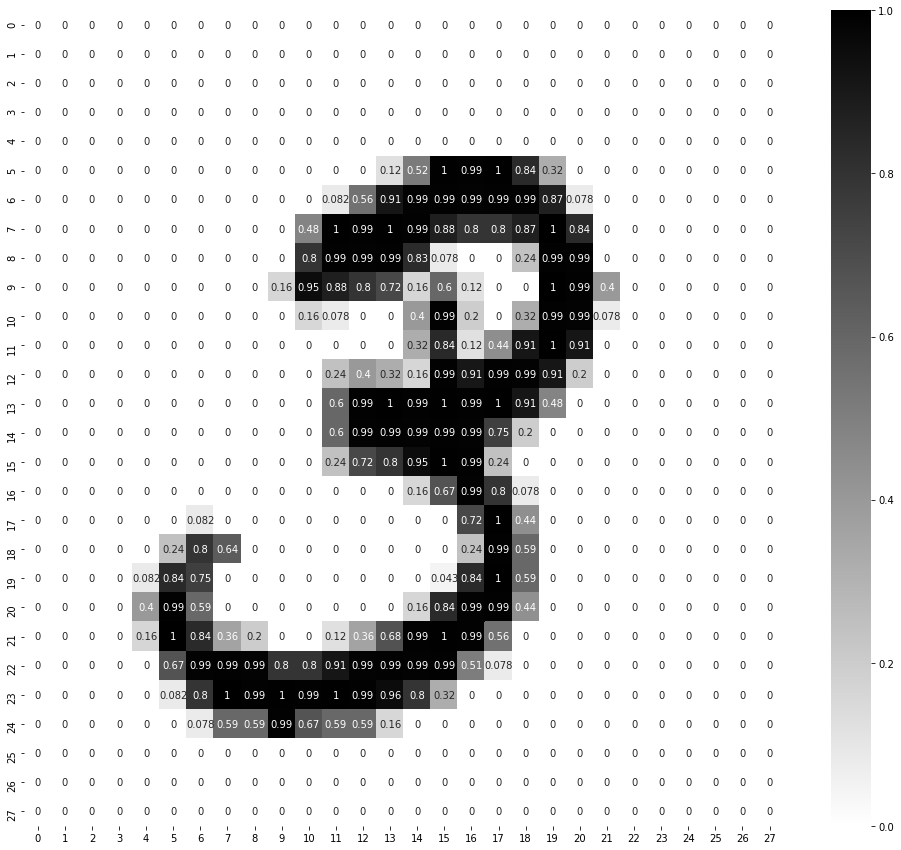

In [173]:
f , ax = plt.subplots ( figsize = ( 17 , 15 ) )
print ( "Number corresponding to the training sample:" , y_train [ 1 ] )
sns.heatmap ( X_train [ 1 ] , cmap = "binary" , annot = True )
plt.show ( )

### Creating an Artificial Neural Network (ANN)

In [174]:
# Creating the layers of neural network
layers = [ tf.keras.layers.Flatten ( input_shape = ( 28 , 28 ) , name = "InputLayer" ) , 
          tf.keras.layers.Dense ( 300 , activation = "relu" , name = "HiddenLayer1" ) , 
          tf.keras.layers.Dense ( 300 , activation = "relu" , name = "HiddenLayer2" ) ,
          tf.keras.layers.Dense ( 300 , activation = "relu" , name = "HiddenLayer3" ) , 
          tf.keras.layers.Dense ( 100 , activation = "relu" , name = "HiddenLayer4" ) , 
          tf.keras.layers.Dense ( 10 , activation = "softmax" , name = "OutputLayer" ) ]
model = tf.keras.Sequential ( layers )

In [175]:
# Model Summary
model.summary ( )

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
HiddenLayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
HiddenLayer2 (Dense)         (None, 300)               90300     
_________________________________________________________________
HiddenLayer3 (Dense)         (None, 300)               90300     
_________________________________________________________________
HiddenLayer4 (Dense)         (None, 100)               30100     
_________________________________________________________________
OutputLayer (Dense)          (None, 10)                1010      
Total params: 447,210
Trainable params: 447,210
Non-trainable params: 0
________________________________________________

In [176]:
# Finding number of parameters
# Number of parameters = First layer * Second layer + bias
print ( "1st Hidden Layer:" , 28 * 28 * 300 + 300 , "parameters" )
print ( "2nd Hidden Layer:" , 300 * 300 + 300 , "parameters" )
print ( "3rd Hidden Layer:" , 300 * 300 + 300 , "parameters" )
print ( "4th Hidden Layer:" , 300 * 100 + 100 , "parameters" )
print ( "Output Layer:" , 100 * 10 + 10 , "parameters" )

1st Hidden Layer: 235500 parameters
2nd Hidden Layer: 90300 parameters
3rd Hidden Layer: 90300 parameters
4th Hidden Layer: 30100 parameters
Output Layer: 1010 parameters


In [177]:
# Initial Weights assigned randomly ( No weight initialization technique has been used )
model.get_weights ( )

[array([[-0.01632023,  0.0105976 ,  0.03655334, ..., -0.04663157,
         -0.02285742, -0.05792394],
        [-0.06766468, -0.0414096 ,  0.00358651, ...,  0.01465604,
          0.04121245, -0.05342948],
        [ 0.01955171,  0.00985087,  0.01035699, ..., -0.06119171,
         -0.0698365 , -0.06160635],
        ...,
        [ 0.02237921,  0.0413849 , -0.02514635, ...,  0.05340752,
          0.04420754,  0.02130916],
        [-0.03904228, -0.07317044,  0.07307118, ...,  0.05132379,
          0.04011832, -0.05332293],
        [ 0.06643324,  0.01985934,  0.01224935, ..., -0.00039316,
         -0.04089861,  0.04077065]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [178]:
# Initial random Weights and biases for 1st hidden layer
weights , biases = model.layers [ 1 ].get_weights ( )
print ( "Shape of Weights for 1st Hidden layer:\n" , weights.shape )
print ( "Weights for 1st Hidden layer:\n" , weights )
print ( "Shape of Biases for 1st Hidden layer:\n" , biases.shape )
print ( "Biases for 1st hidden layer:\n" , biases )

Shape of Weights for 1st Hidden layer:
 (784, 300)
Weights for 1st Hidden layer:
 [[-0.01632023  0.0105976   0.03655334 ... -0.04663157 -0.02285742
  -0.05792394]
 [-0.06766468 -0.0414096   0.00358651 ...  0.01465604  0.04121245
  -0.05342948]
 [ 0.01955171  0.00985087  0.01035699 ... -0.06119171 -0.0698365
  -0.06160635]
 ...
 [ 0.02237921  0.0413849  -0.02514635 ...  0.05340752  0.04420754
   0.02130916]
 [-0.03904228 -0.07317044  0.07307118 ...  0.05132379  0.04011832
  -0.05332293]
 [ 0.06643324  0.01985934  0.01224935 ... -0.00039316 -0.04089861
   0.04077065]]
Shape of Biases for 1st Hidden layer:
 (300,)
Biases for 1st hidden layer:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [179]:
# Initializing the metrics, optimizer and loss function
model.compile ( metrics = [ "accuracy" ] , optimizer = "SGD" , loss = "sparse_categorical_crossentropy" )

In [180]:
# Fitting the model on training data
history = model.fit ( X_train , y_train , epochs = 30 , validation_data = ( X_valid , y_valid ) )

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 1.1748 - accuracy: 0.6481 - val_loss: 0.3192 - val_accuracy: 0.9066
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2699 - accuracy: 0.9222 - val_loss: 0.2018 - val_accuracy: 0.9408
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2066 - accuracy: 0.9401 - val_loss: 0.1681 - val_accuracy: 0.9502
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1654 - accuracy: 0.9522 - val_loss: 0.1344 - val_accuracy: 0.9624
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1291 - accuracy: 0.9616 - val_loss: 0.1169 - val_accuracy: 0.9698
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1055 - accuracy: 0.9695 - val_loss: 0.1074 - val_accuracy: 0.9698
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0887 - accuracy: 0.9750 - val_loss: 0.0994 - val_accuracy:

### Visualizing the metrics of training

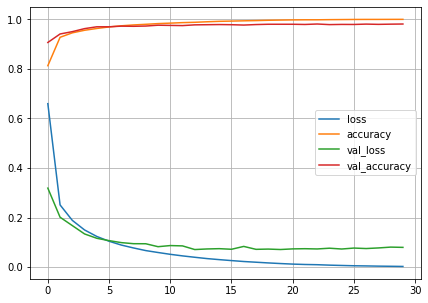

In [181]:
pd.DataFrame ( history.history ).plot ( figsize = ( 7 , 5 ) )
plt.grid ( True )
plt.show ( )

### Saving the model to visualize it using Netron
<a href = "https://github.com/lutzroeder/netron" target = "popup">Download Netron - A tool to visualize Neural Networks</a>

In [182]:
# A custom function to create a folder and save models in reference to timestamps
def SaveModel ( dir = "Saved Models" ):
  os.makedirs ( dir , exist_ok = True )
  filename = time.strftime ( "Model_%d_%m_%Y_%H_%M_%S.h5" )
  model_path = os.path.join ( dir , filename )
  print ( "The model has been saved at" , model_path )
  return model_path

In [183]:
model.save ( SaveModel ( ) )

The model has been saved at Saved Models/Model_24_01_2021_06_38_36.h5


### Evaluation Metrics

In [184]:
print ( model.evaluate ( X_test , y_test ) )
print ( "Test loss:" , model.evaluate ( X_test , y_test ) [ 0 ] )
print ( "Test accuracy:" , model.evaluate ( X_test , y_test ) [ 1 ] )

313/313 [==============================] - 1s 2ms/step - loss: 0.0854 - accuracy: 0.9783
[0.08539991825819016, 0.9782999753952026]
313/313 [==============================] - 1s 2ms/step - loss: 0.0854 - accuracy: 0.9783
Test loss: 0.08539991825819016
313/313 [==============================] - 1s 2ms/step - loss: 0.0854 - accuracy: 0.9783
Test accuracy: 0.9782999753952026


### Predicting the first 5 test samples

Predicted Value: 7
Actual Representation:


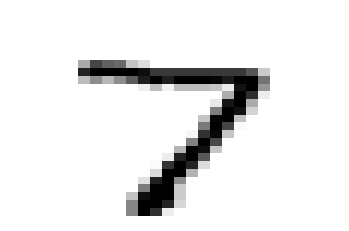

Predicted Value: 2
Actual Representation:


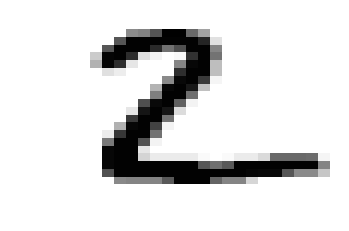

Predicted Value: 1
Actual Representation:


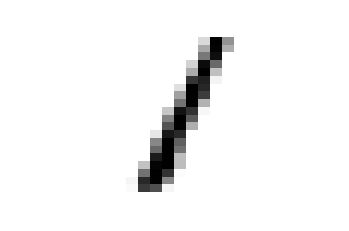

Predicted Value: 0
Actual Representation:


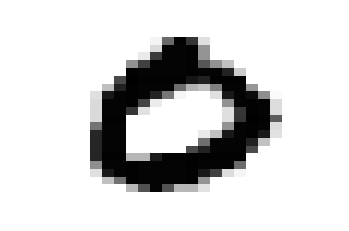

Predicted Value: 4
Actual Representation:


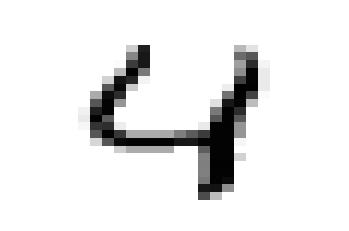

In [185]:
for i in range ( 5 ):
  print ( "Predicted Value:" , model.predict ( X_test [ : 5 ] ).round ( 2 ).argmax ( axis = 1 ) [ i ] )
  print ( "Actual Representation:" )
  sns.heatmap ( X_test [ i ] , cmap = "binary" , cbar = False )
  plt.axis ( "off" )
  plt.show ( )